# Visual documentation of EAMENA Heritage Places Concept values

Associate iconic images to HP EAMENA's concepts[^1] to illustrate the latters (ex: Threat type = Agricultural/Pastoral).
<br><br>
<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/arches-v7-hp-data-erd-img.png" width = "650">
</center>

The objective is :
* to document particular cases with visual documentation having EAMENA and EXIF ​​metadata (Author, Subject, ..., EAMENA UUID, etc.).
* complete the interactive ERD by linking the UUID concept image to the RM.
* extend the finalization of reference data documentation.

[^1]: Lorem.

## Libraries and paths

In [1]:
%cd /content/
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git

!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm
%cd /content/

!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
# %cd /content/eamena-functions/mds
# import mds
%cd /content/eamena-functions/
import mds
from mds import mds

# librairies
# for the images..
import os
import pandas as pd
!pip install exif
from exif import Image as exImg
from IPython.display import Image as IpImg
from IPython.display import Markdown, display, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive
# ..and for the graph
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from pyvis import network as net
import folium
import json
from google.colab import files

cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
# list
list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list.tsv'

/content
rm: cannot remove '/content/eamena-data': No such file or directory
Cloning into 'eamena-data'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 149 (delta 29), reused 140 (delta 22), pack-reused 0
Receiving objects: 100% (149/149), 3.80 MiB | 21.40 MiB/s, done.
Resolving deltas: 100% (29/29), done.
rm: cannot remove 'cultural-heritage': No such file or directory
Cloning into 'cultural-heritage'...
remote: Enumerating objects: 3270, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3270 (delta 0), reused 1 (delta 0), pack-reused 3260
Receiving objects: 100% (3270/3270), 34.23 MiB | 18.65 MiB/s, done.
Resolving deltas: 100% (2386/2386), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

## Photographs listing

Photos of iconic cases of threats types (agricole, vandalsim, etc.)

In [2]:
df_list = pd.read_csv(list_path, sep='\t')
df_list['image_path'] = cases_img_path + df_list['image']
df_list

,label,image,uuid,uuid_parent,image_path
0,Threat type - Agricultural/Pastoral,threattype-agricole.jpg,767e9467-3bc2-3f71-9427-0ace387bd843,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
1,Threat type - Vandalism,threattype-vandalism-1.jpg,4e66f55d-0717-4d1f-89aa-949771ace643,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
2,Threat type - Looting and Illegal Activities,threattype-looting.jpg,66457bbc-965b-36aa-8fff-de0a28b68f33,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
3,Threat type - Building and Development,threattype-urbanism.jpg,8e602902-3c8a-3430-a7df-fff6df57db8b,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...


**4e66f55d-0717-4d1f-89aa-949771ace643**

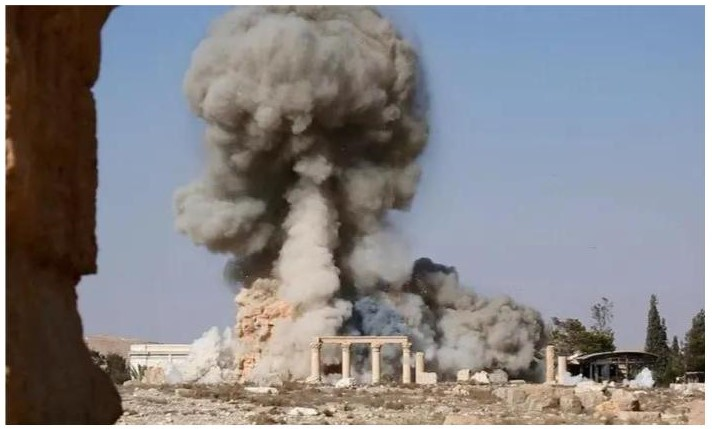

**Threat type - Vandalism**

In [6]:
display(Markdown(f"**{df_list.loc[1, 'uuid']}**"))
display(IpImg(df_list.loc[1, 'image_path']))
display(Markdown(f"**{df_list.loc[1, 'label']}**"))

## Graph

Collect the subgraphs (i.e. components) of the RM

In [7]:
my_rm = 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
gm.rm_selected_one(my_rm, gm.rm_list())
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')

/content/cultural-heritage/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory
EAMENA_Heritage%20Place.json has been loaded into the folder inputResourceModels/


Create the RM graph and add the photos to it

In [ ]:
# OK
rm_project= 'EAMENA'
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# create the graph of images
G1 = gm.create_img_graph(G = G)
# merge with the RM graph
G_merged = nx.compose(G, G1)
hp_G = gm.plot_net_graph(G_merged, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

In [13]:
df_list = pd.read_csv(list_path, sep='\t')
uuid_parents = df_list['uuid_parent'].unique()
for uuid_parent in uuid_parents:
    selected_rows = df_list[df_list['uuid_parent'] == uuid_parent]
    print(f"Rows for uuid_parent = {uuid_parent}:\n", selected_rows, "\n")
type(selected_rows)

Rows for uuid_parent = 34cfea7b-c2c0-11ea-9026-02e7594ce0a0:
                                           label                       image  \
0           Threat type - Agricultural/Pastoral     threattype-agricole.jpg   
1                       Threat type - Vandalism  threattype-vandalism-1.jpg   
2  Threat type - Looting and Illegal Activities      threattype-looting.jpg   
3        Threat type - Building and Development     threattype-urbanism.jpg   

                                   uuid                           uuid_parent  
0  767e9467-3bc2-3f71-9427-0ace387bd843  34cfea7b-c2c0-11ea-9026-02e7594ce0a0  
1  4e66f55d-0717-4d1f-89aa-949771ace643  34cfea7b-c2c0-11ea-9026-02e7594ce0a0  
2  66457bbc-965b-36aa-8fff-de0a28b68f33  34cfea7b-c2c0-11ea-9026-02e7594ce0a0  
3  8e602902-3c8a-3430-a7df-fff6df57db8b  34cfea7b-c2c0-11ea-9026-02e7594ce0a0   

Rows for uuid_parent = 34cfea79-c2c0-11ea-9026-02e7594ce0a0:
                       label            image                uuid  \
4  Disturb

pandas.core.frame.DataFrame

In [14]:
# Dev
def create_img_graph(list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list.tsv', cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/", G = None, mass = 10, size = 20):
	"""
	Creates a Network graph of the images (i.e. values) giving a TSV dataframe and replace the parent node with the RM equivalent node

	:param list_path: where the images are listed
	:param G: the RM networkx graph
	:param mass: mass of the node (layout)
	:param size: size of the node (layout)

	:Example:
	>> # TODO
	"""
	# TODO: factorise paths in the parameters
	import pandas as pd
	import networkx as nx
	df_list = pd.read_csv(list_path, sep='\t')
	df_list['image_path'] = cases_img_path + df_list['image']
	G1 = nx.DiGraph()
	uuid_parents = df_list['uuid_parent'].unique()
	# slice the df
	for uuid_parent in uuid_parents:
		print("*read: " + uuid_parent)
		selected_rows = df_list[df_list['uuid_parent'] == uuid_parent]
		print(f"Rows for uuid_parent = {uuid_parent}:\n", selected_rows, "\n")
		type(selected_rows)
		# Add nodes to the graph
		for index, row in df_list.iterrows():
			G1.add_node(row['uuid'], crm = 'none', id = row['uuid'], name = row['label'], label = row['label'], title = 'lorem', color = 'none', size = size, mass = mass, shape='image', image = row['image_path'])
	  # Add edges to the graph
		for index, row in df_list.iterrows():
			G1.add_edge(row['uuid'], row['uuid_parent'], label = "my_label")# , weight=row['weight'])
		# replace the parent node
		# TODO: generalise the node_parent (currently only works for 'Threat Cause [Type]')
		# node_parent = '34cfea7b-c2c0-11ea-9026-02e7594ce0a0'
		if uuid_parent in G:
			G1.add_node(uuid_parent, **G.nodes[uuid_parent])
		return(G1)

rm_project= 'EAMENA'
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# create the graph of images
G1 = create_img_graph(G = G)
# merge with the RM graph
G_merged = nx.compose(G, G1)
hp_G = gm.plot_net_graph(G_merged, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)


*read: 34cfea7b-c2c0-11ea-9026-02e7594ce0a0
Rows for uuid_parent = 34cfea7b-c2c0-11ea-9026-02e7594ce0a0:
                                           label                       image  \
0           Threat type - Agricultural/Pastoral     threattype-agricole.jpg   
1                       Threat type - Vandalism  threattype-vandalism-1.jpg   
2  Threat type - Looting and Illegal Activities      threattype-looting.jpg   
3        Threat type - Building and Development     threattype-urbanism.jpg   

                                   uuid                           uuid_parent  \
0  767e9467-3bc2-3f71-9427-0ace387bd843  34cfea7b-c2c0-11ea-9026-02e7594ce0a0   
1  4e66f55d-0717-4d1f-89aa-949771ace643  34cfea7b-c2c0-11ea-9026-02e7594ce0a0   
2  66457bbc-965b-36aa-8fff-de0a28b68f33  34cfea7b-c2c0-11ea-9026-02e7594ce0a0   
3  8e602902-3c8a-3430-a7df-fff6df57db8b  34cfea7b-c2c0-11ea-9026-02e7594ce0a0   

                                          image_path  
0  https://raw.githubusercontent.com/